In [14]:
from scraping import scraper
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
years = np.arange(2000, 2023)
scraper = scraper(years = years)
games = scraper.fit()

... 2021-2022 ...  (23/23) ...


In [41]:
gamesq = games.copy()[(games['Game_home'] > 4) & (games['Game_away'] > 4) & (games['Rest'] < 20) & (games['Rest'] > -20)]

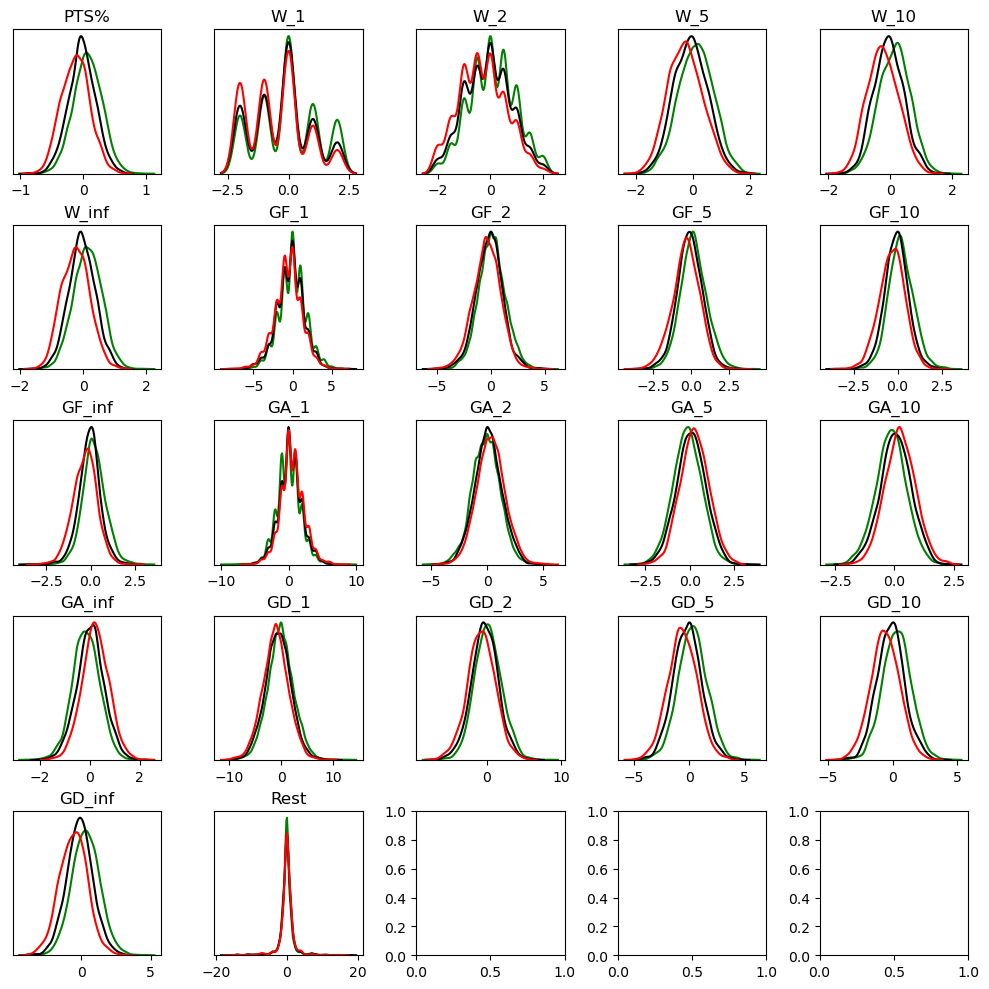

In [42]:
_, ax = plt.subplots(5, 5, figsize = (10,10)); ax = ax.flatten()

for i, f in enumerate(games.columns[9:-3]) :

    df = gamesq.groupby('Result').get_group(1)
    sns.kdeplot(df[f], c = 'g', ax = ax[i])
    df = gamesq.groupby('Result').get_group(0)
    sns.kdeplot(df[f], c = 'k', ax = ax[i])
    df = gamesq.groupby('Result').get_group(-1)
    sns.kdeplot(df[f], c = 'r', ax = ax[i])
    ax[i].set_yticks([])
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].set_title(f)

plt.tight_layout(h_pad = 0.5, w_pad = 0.1)

In [38]:
games['W_1']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
8735    0.0
8736    1.0
8737   -2.0
8738    0.0
8739    1.0
Name: W_1, Length: 8740, dtype: float64

In [50]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

# Load historical match data
data = games.copy()[(games['Game_home'] >= 5) & (games['Game_away'] >= 5)]
#train, test = train_test_split(data, test_size = 0.1)
train = data[data['Season'] <  2022]
test  = data[data['Season'] == 2022]
X_train, X_test = np.array(train[scraper.features]), np.array(test[scraper.features])
y_train, y_test = np.array(train[['Win', 'Draw', 'Loss']]), np.array(test[['Win', 'Draw', 'Loss']])

# Create neural network model
model = Sequential()
model.add(Dense(32, activation = 'relu', input_dim = len(scraper.features)))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(8,  activation = 'relu'))
model.add(Dense(3,  activation = 'softmax'))

# Compile model
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

# Train model
model.fit(X_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
233/233 [==============================] - 1s 527us/step - loss: 1.0610 - accuracy: 0.4532
Epoch 2/50
233/233 [==============================] - 0s 500us/step - loss: 1.0104 - accuracy: 0.5142
Epoch 3/50
233/233 [==============================] - 0s 516us/step - loss: 0.9989 - accuracy: 0.5170
Epoch 4/50
233/233 [==============================] - 0s 531us/step - loss: 0.9945 - accuracy: 0.5187
Epoch 5/50
233/233 [==============================] - 0s 500us/step - loss: 0.9922 - accuracy: 0.5201
Epoch 6/50
233/233 [==============================] - 0s 521us/step - loss: 0.9900 - accuracy: 0.5227
Epoch 7/50
233/233 [==============================] - 0s 552us/step - loss: 0.9896 - accuracy: 0.5244
Epoch 8/50
233/233 [==============================] - 0s 539us/step - loss: 0.9880 - accuracy: 0.5226
Epoch 9/50
233/233 [==============================] - 0s 541us/step - loss: 0.9872 - accuracy: 0.5246
Epoch 10/50
233/233 [==============================] - 0s 492us/step - loss: 0.985

In [51]:
pred = model.predict(X_test)
test[['W_pred', 'D_pred', 'L_pred']] = pred

11/11 [==============================] - 0s 531us/step


/var/folders/x8/gymrgfns32bd6rd_ksf19p3m0000gn/T/ipykernel_33837/1302692932.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[['W_pred', 'D_pred', 'L_pred']] = pred
/var/folders/x8/gymrgfns32bd6rd_ksf19p3m0000gn/T/ipykernel_33837/1302692932.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[['W_pred', 'D_pred', 'L_pred']] = pred
/var/folders/x8/gymrgfns32bd6rd_ksf19p3m0000gn/T/ipykernel_33837/1302692932.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [52]:
p = np.zeros_like(pred)
p[np.arange(len(pred)), pred.argmax(1)] = 1
test['RW'] = 1 - np.sign(np.abs(y_test - p).sum(axis = 1))

/var/folders/x8/gymrgfns32bd6rd_ksf19p3m0000gn/T/ipykernel_33837/1268772021.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['RW'] = 1 - np.sign(np.abs(y_test - p).sum(axis = 1))
